# Исследования рынка общепита в Москве для принятия решения об открытии нового заведения

## Описание проекта
В рамках данного проекта мы работаем с данными, предоставленными инвесторами из фонда «Shut Up and Take My Money», которые решили открыть заведение общественного питания в Москве. Мы подготовим исследование рынка Москвы, найдем интересные особенности и презентуем полученные результаты, которые в будущем помогут в выборе подходящего инвесторам места.

## Описание данных 
Нам доступен датасет с заведениями общественного питания Москвы, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. Информация, размещённая в сервисе Яндекс Бизнес, могла быть добавлена пользователями или найдена в общедоступных источниках. Она носит исключительно справочный характер.

Датасет содержит следующие столбцы:
- name — название заведения;
- address — адрес заведения;
- category — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- hours — информация о днях и часах работы;
- lat — широта географической точки, в которой находится заведение;
- lng — долгота географической точки, в которой находится заведение;
- rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона, например;
- middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill;
- middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill;
- chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки);
- district — административный район, в котором находится заведение, например Центральный административный округ;
- seats — количество посадочных мест.

## Обзор данных
Загрузим данные о заведениях общественного питания Москвы.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import numpy as np
from folium import Map, Choropleth
import json
with open('/datasets/admin_level_geomap.geojson', 'r') as f:
    geo_json = json.load(f)
from folium import Map, Marker
from folium.plugins import MarkerCluster
from folium import Marker

In [2]:
data = pd.read_csv('/datasets/moscow_places.csv')

In [3]:
# обзор датафрейма data 
data.head()

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


In [5]:
data['category'].value_counts()

кафе               2378
ресторан           2043
кофейня            1413
бар,паб             765
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

### Выводы
- В датасете представлено 8406 заведений разных категорий (кафе, ресторан, кофейня, бар и пр.) По числу открытых заведений лидируют кафе, рестораны и кофейни. Наименьшее количество приходится на столовые и булочные. 
- Пропуски обнаружены в следующих столбцах: Дни и часы работы, Категория цен, Средняя стоимость заказа, Оценка среднего чека, Цена одной чашки капучино, Количество посадочных мест. Поскольку данные преимуществено добавлены пользователями или найдены в общедоступных источниках, наличие пропусков не представляется удивительным.
- Большинство столбцов представлено типом объекта, часть — вещественным и один столбец — целым. В целом типа данных соответствуют содержанию столбцов. Тип данных столбца chain можно поменять на булев, т.к. его содержание зависит от условия: является сетевым заведением или нет.  

## Предобработка данных
В данном разделе мы изучим, есть ли дубликаты в данных; поищим пропуски и постараемся их обработать, а также создадим два новых столбца с названиями улиц из столбца с адресом, а также с обозначением, что заведение работает ежедневно и круглосуточно (24/7). 

In [6]:
# проверим, есть ли явные дубликаты в данных
data.duplicated().sum()

0

In [7]:
# проверим, есть ли неявные дубликаты в названиях
data['name'] = data['name'].str.lower()
data['name'] = data['name'].str.strip()
data['name'].duplicated().sum()

2894

In [8]:
# проверим, есть ли неявные дубликаты в адресах
data['address'] = data['address'].str.lower()
data['address'] = data['address'].str.strip()
data['address'].duplicated().sum()

2654

In [9]:
# найдем и удалим неявные дубликаты (повторяющиеся названия и адреса) 
data = data.drop_duplicates(subset=['name', 'address'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8402 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8402 non-null   object 
 1   category           8402 non-null   object 
 2   address            8402 non-null   object 
 3   district           8402 non-null   object 
 4   hours              7867 non-null   object 
 5   lat                8402 non-null   float64
 6   lng                8402 non-null   float64
 7   rating             8402 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8402 non-null   int64  
 13  seats              4792 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 984.6+ KB


In [10]:
# посчитаем количество пропусков
data.isna().sum()

name                    0
category                0
address                 0
district                0
hours                 535
lat                     0
lng                     0
rating                  0
price                5087
avg_bill             4586
middle_avg_bill      5253
middle_coffee_cup    7867
chain                   0
seats                3610
dtype: int64

In [11]:
# добавим в датасет столбец с названиями улиц из столбца с адресом
data['street'] = data['address'].str.split(', ', expand=True)[1]
data.head()

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street
0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN,улица дыбенко
1,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0,улица дыбенко
2,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0,клязьминская улица
3,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN,улица маршала федоренко
4,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0,правобережная улица


Создадим столбец is_24/7 с обозначением, что заведение работает ежедневно и круглосуточно (24/7):
- логическое значение True — если заведение работает ежедневно и круглосуточно;
- логическое значение False — в противоположном случае.

In [12]:
# добавим в датасет столбец is_24/7 из столбца hours
data['is_24/7'] = data['hours'] == 'ежедневно, круглосуточно'
data.head()

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24/7
0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN,улица дыбенко,False
1,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0,улица дыбенко,False
2,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0,клязьминская улица,False
3,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN,улица маршала федоренко,False
4,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0,правобережная улица,False


Произведем замену типа данных в столбце chain на булев, т.к. мы имеем бинарные значения.

In [13]:
data['chain'] = data['chain'].astype('bool')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8402 entries, 0 to 8405
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8402 non-null   object 
 1   category           8402 non-null   object 
 2   address            8402 non-null   object 
 3   district           8402 non-null   object 
 4   hours              7867 non-null   object 
 5   lat                8402 non-null   float64
 6   lng                8402 non-null   float64
 7   rating             8402 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8402 non-null   bool   
 13  seats              4792 non-null   float64
 14  street             8402 non-null   object 
 15  is_24/7            8402 non-null   bool   
dtypes: bool(2), float64(6), 

In [14]:
# взглянем еще раз на получившийся датасет  
data.head(10)

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24/7
0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,False,NaN,улица дыбенко,False
1,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,False,4.0,улица дыбенко,False
2,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,False,45.0,клязьминская улица,False
3,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,False,NaN,улица маршала федоренко,False
4,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,True,148.0,правобережная улица,False
5,sergio pizza,пиццерия,"москва, ижорская улица, вл8б",Северный административный округ,"ежедневно, 10:00–23:00",55.888010,37.509573,4.6,средние,NaN,NaN,NaN,False,NaN,ижорская улица,False
6,огни города,"бар,паб","москва, клязьминская улица, 9, стр. 3",Северный административный округ,пн 15:00–04:00; вт-вс 15:00–05:00,55.890752,37.524653,4.4,средние,Средний счёт:199 ₽,199.0,NaN,False,45.0,клязьминская улица,False
7,mr. уголёк,быстрое питание,"москва, клязьминская улица, 9, стр. 3",Северный административный округ,"пн-чт 10:00–22:00; пт,сб 10:00–23:00; вс 10:00...",55.890636,37.524303,4.7,средние,Средний счёт:200–300 ₽,250.0,NaN,False,45.0,клязьминская улица,False
8,donna maria,ресторан,"москва, дмитровское шоссе, 107, корп. 4",Северный административный округ,"ежедневно, 10:00–22:00",55.880045,37.539006,4.8,средние,Средний счёт:от 500 ₽,500.0,NaN,False,79.0,дмитровское шоссе,False
9,готика,кафе,"москва, ангарская улица, 39",Северный административный округ,"ежедневно, 12:00–00:00",55.879038,37.524487,4.3,средние,Средний счёт:1000–1200 ₽,1100.0,NaN,False,65.0,ангарская улица,False


### Выводы
Мы сделали предобработку данных. Явные и неявные дубликаты обнаружены не были. Пропуски встретились в таких столбцах как Дни и часы работы, Категория цен, Средняя стоимость заказа, Оценка среднего чека, Цена одной чашки капучино, Количество посадочных мест. Оставили их как есть, т.к. ни удалить, ни восполнить мы не можем. В датасет были добавлены новые столбцы street с названиями улиц и is_24/7 с обозначением, что заведение работает ежедневно и круглосуточно. 

## Анализ данных 
В данном разделе мы исследуем рынок общественного питания в Москве с разных сторон.
### Распределение заведений по категориям
Узнаем, какие категории заведений представлены в данных. Затем исследуем количество объектов общественного питания по категориям: рестораны, кофейни, пиццерии, бары и так далее. Построим визуализацию для того, чтобы ответить на вопрос о распределении заведений по категориям.

In [15]:
# выведем категории заведений в данных
data['category'].value_counts()

кафе               2376
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

In [16]:
# выведем количество объектов общественного питания по категориям
category_date = (
    data
    .groupby('category')
    .agg(count=('name','count'))
    .reset_index()
    .sort_values('count', ascending=False)
)

category_date['share'] = round(category_date['count'] / sum(category_date['count']) * 100, 2)

category_date

,category,count,share
3,кафе,2376,28.28
6,ресторан,2042,24.30
4,кофейня,1413,16.82
0,"бар,паб",764,9.09
5,пиццерия,633,7.53
2,быстрое питание,603,7.18
7,столовая,315,3.75
1,булочная,256,3.05


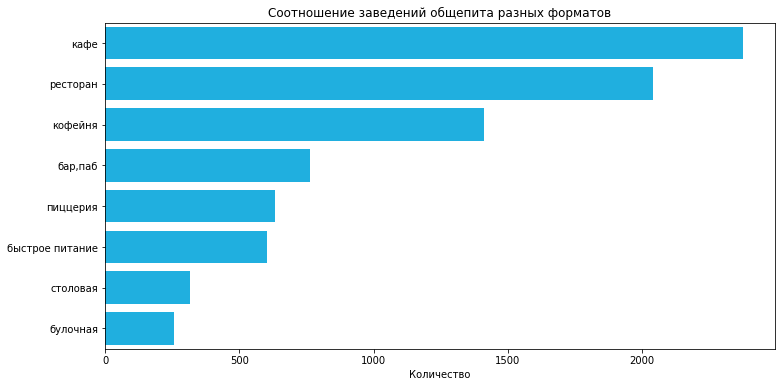

In [17]:
# визуализируем предыдущую таблицу
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='count', y='category', 
                 data=category_date, color='deepskyblue')
ax.set_title('Соотношение заведений общепита разных форматов')
ax.set_xlabel('Количество') 
ax.set_ylabel('')
plt.show()

Как мы видим, подавляющее количество заведений — кафе и рестораны (28% и 24% соответственно).
Далее идут кофейни (17%). Меньше всего представлены столовые и булочные (4% и 3% соответственно).

### Распределение посадочных мест
Исследуем количество посадочных мест в местах по категориям: рестораны, кофейни, пиццерии, бары и так далее.

In [18]:
# соберем таблицу по общему и среднему количеству посадочных мест в разрезе категорий
seats = (
    data
    .groupby('category')
    .agg({'name' : 'count', 'seats' :'mean'})
    .reset_index()
)

seats.columns = ['category', 'count', 'mean']
seats['mean'] = round(seats['mean'], 2)
seats = seats.sort_values('mean', ascending=False)
seats

,category,count,mean
0,"бар,паб",764,124.48
6,ресторан,2042,121.89
4,кофейня,1413,111.20
7,столовая,315,99.75
2,быстрое питание,603,98.89
3,кафе,2376,97.37
5,пиццерия,633,94.50
1,булочная,256,89.39


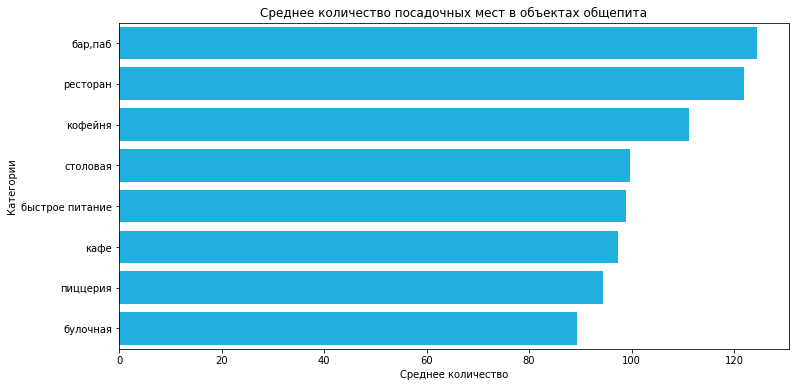

In [19]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='mean', y='category', 
                 data=seats, color='deepskyblue')
ax.set_title('Среднее количество посадочных мест в объектах общепита')
ax.set_xlabel('Среднее количество') 
ax.set_ylabel('Категории')
plt.show(); 

Как мы видим, наибольшее количество посадочных мест приходится на бары и рестораны, а также кофейни. Наименьшее — на булочные, где, как правило, посетители не задерживаются, но есть и заведения исключения (типа Вольчека). 

### Соотношение сетевых и несетевых заведений
Рассмотрим и изобразим соотношение сетевых и несетевых заведений в датасете.

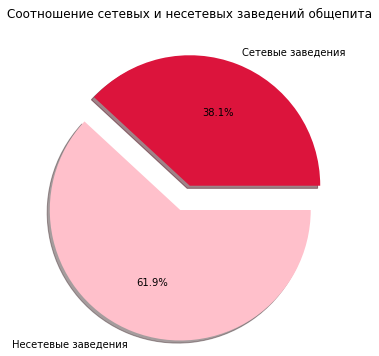

In [20]:
chains = data.groupby('chain').agg(count=('name','count')).reset_index()
plt.figure(figsize=(6, 6))
colors = ['pink', 'crimson']
explode = (0.2, 0)
plt.pie(chains['count'],
        labels=chains['chain'].map({True: 'Сетевые заведения', False: 'Несетевые заведения'}), 
        colors=colors,
        explode=explode, 
        autopct='%1.1f%%',
        counterclock=False, 
        shadow=True)
plt.title('Соотношение сетевых и несетевых заведений общепита')
plt.show()

In [21]:
# сгруппируем данные по столбцу chain
chains = (
    data
    .groupby('chain')
    .agg(count=('name','count'))
    .reset_index()
    .sort_values('count', ascending=False)
)
# посчитаем соотношение в долях 
chains['share'] = round(chains['count'] / sum(chains['count']) * 100, 2)
chains

,chain,count,share
0,False,5199,61.88
1,True,3203,38.12


На столичном рынке общепита лидируют несетевые заведения, занимая 62%.

Исследуем, какие категории заведений чаще являются сетевыми.

In [22]:
# соберем таблицу с количеством сетевых заведений в разрезе категорий, а также общее число заведений разных форматов
chain_type = (
    data
    .groupby(['category'])
    .agg({'chain' :'sum', 'name' : 'count'})
    .reset_index()
)
chain_type.columns = ['category', 'chain_count', 'total_count']

# добавим доли сетевых заведений от общего числа заведений разных форматов
['share'] = round(chain_type['chain_count'] / chain_type['total_count'] * 100, 2)
chain_type = chain_type.sort_values(by='share', ascending=False)
chain_type

,category,chain_count,total_count,share
1,булочная,157,256,61.33
5,пиццерия,330,633,52.13
4,кофейня,720,1413,50.96
2,быстрое питание,232,603,38.47
6,ресторан,729,2042,35.70
3,кафе,779,2376,32.79
7,столовая,88,315,27.94
0,"бар,паб",168,764,21.99


По абсолютному количеству среди сетей лидируют кафе и рестораны (779 и 730 точек соответственно).

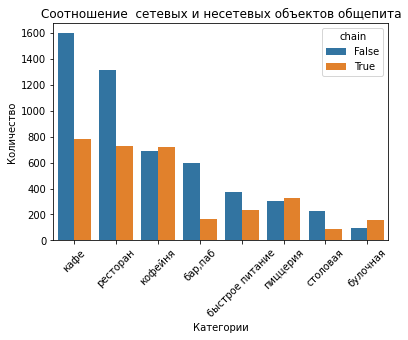

In [40]:
chain_category = data.groupby(['category','chain']).agg({'name' : 'count'})
chain_category = chain_category.reset_index().sort_values(by = 'name', ascending = False)

sns.barplot(data=chain_category, x='category', y='name', hue='chain')
plt.title('Соотношение  сетевых и несетевых объектов общепита')
plt.xlabel('Категории')
plt.ylabel('Количество')
plt.xticks(rotation=45);

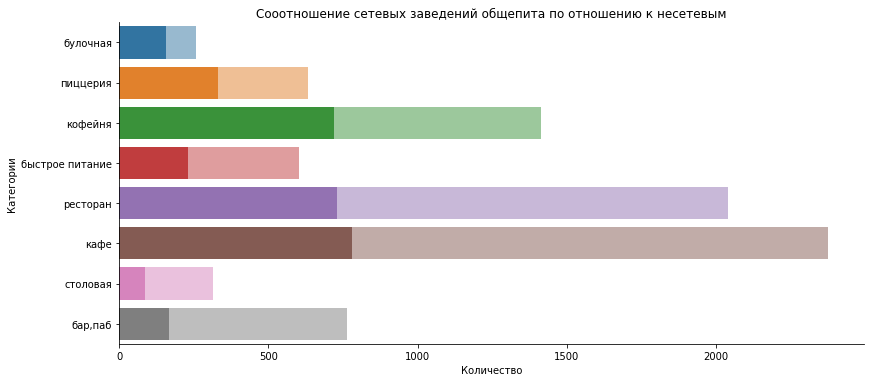

In [43]:
# визуализируем таблицу выше

ax = sns.catplot(data=chain_type, 
                 kind="bar", 
                 x="chain_count", 
                 y="category",               
                 alpha=1, 
                 aspect=12/5)
ax1 = sns.barplot(x='total_count', y='category', data=chain_type, alpha=0.5,  orient='h')
ax.set_axis_labels('Количество', 'Категории')
plt.title('Сооотношение сетевых заведений общепита по отношению к несетевым')
plt.show()

Доли сетевых заведений выделены насыщенными цветами. Самые большие доли сетевых объектов приходятся на булочные, пиццерии и кофейни — 61%, 52% и 51% соответственно от общего числа заведений этого типа. На доли заведений быстрого питания приходится 38% сетевых, для ресторанов она составляет 36%, а для кафе — 33%. Для столовых и баров/пабов такое совсем не типично (только 28% и 22% соответственно являются сетевыми.

### Топ-15 популярных сетей в Москве 
Сгруппируем данные по названиям заведений и найдем топ-15 популярных сетей в Москве. Затем построим подходящую для такой информации визуализацию. 

In [ ]:
# получаем названия популярных заведений
pop_ch = data.query('chain == 1').groupby(['name']).agg(count=('name','count')).sort_values('count', ascending=False).reset_index()
pop_ch_15 = pop_ch.head(15)
pop_ch_15

In [ ]:
# подготовим сводную таблицу
pop_chains = data.query('chain == 1').groupby(['name']).agg(count=('name','count')).sort_values('count', ascending=False).reset_index()
pop_chains_15 = pop_chains.head(15)

#визуализируем данные
ax = sns.catplot(data=pop_chains_15, 
                 kind="bar", 
                 x="count", 
                 y="name",               
                 alpha=1, 
                 aspect=12/5)
ax1 = sns.barplot(x='count', y='name', data=pop_chains_15, orient='h')
ax.set_axis_labels('Количество', 'Названия')
plt.title('Топ-15 популярных сетей общепита в Москве')
plt.show();

В топ-3 вошли популярная и у всех на слуху кофейня Шоколадница, а также 2 пиццерии — Домино'с пицца и Додо пицца. К признакам, которые объединяют данные заведения можно отнести относительную бюджетность блюд, а также скорость их отдачи. 

### Распределение заведений по районам Москвы
Посмотрим, какие административные районы Москвы присутствуют в датасете. Затем отобразим общее количество заведений и количество заведений каждой категории по районам.

In [ ]:
# выведем районы, представленные в данных
data['district'].value_counts()

Ожидаем большой отрыв центра Москвы от других районов по количеству заведений.

In [ ]:
# обратимся к сводной таблице
data.pivot_table(index='category', 
                 columns='district', 
                 values='name', 
                 aggfunc='count')

В 8 из 9 округов по численности преобладают кафе. Лишь в ЦАО их обгоняют рестораны. 

In [ ]:
# сгруппируем данные по округам и категориям
district_grouped = (
    data.groupby(['district', 'category'],as_index=False) 
        .agg(count=('category','count')).sort_values('count', ascending = False))

# визуализируем таблицу  
district_grouped_bar = px.bar(
    district_grouped, x='district', y='count', color='category',  
    title='Распределение заведений общепита по районам Москвы',
    labels={'category':'Тип заведений', 'count':'Общее кол-во заведений', 'street':'Районы'},
    width=900, height=700) 
district_grouped_bar.update_layout(xaxis={'categoryorder':'total descending'})   
district_grouped_bar.show()

В ЦАО преобладают рестораны, кофейни, кафе и бары. В целом такое распределение между форматами заведений характерно для всех округов Москвы.

### Распределение  средних рейтингов по категориям заведений
Посмотрим, сильно ли различаются усреднённые рейтинги в разных типах общепита.

In [ ]:
# сгруппируем данные по категориям и посчитаем средний рейтинг
category_rate = (
    data
    .groupby(['category'])
    .agg(mean=('rating','mean'))
    .reset_index()
    .sort_values('mean', ascending=False)
)
category_rate

In [ ]:
#визуализируем данные
ax = sns.catplot(data=category_rate, 
                 kind="bar", 
                 x="mean", 
                 y="category",               
                 alpha=1, 
                 aspect=12/5)
ax1 = sns.barplot(x='mean', y='category', data=category_rate)
ax.set_axis_labels('Количество', ' ')
plt.title('Распределение среднего рейтинга по категориям заведений')
plt.show();

В целом оценки различных форматов общепита сходятся и составляют около 4 баллов из 5. 

In [ ]:
# сгруппируем данные по среднему рейтингу в разрезе округов 
rate = (
    data
    .groupby(['category', 'district'])
    .agg(mean=('rating','mean'))
    .reset_index()
    .sort_values('mean', ascending=False)
)
rate.sample(10)

Построим фоновую картограмму (хороплет) со средним рейтингом заведений каждого района.

In [ ]:
# группируем данные по категориям общепита и округам
rate = (
    data
    .groupby(['category', 'district'])
    .agg(mean=('rating','mean'))
    .reset_index()
    .sort_values('mean', ascending=False)
)

# загружаем JSON-файл с границами округов Москвы
state_geo = '/datasets/admin_level_geomap.geojson'
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=rate,
    columns=['district', 'mean'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Средний рейтинг заведений по районам',
).add_to(m)

# выводим карту
m

Судя по карте, посетители высоко оценивают заведения только в центре Москвы. 

Отобразим все заведения датасета на карте с помощью кластеров средствами библиотеки folium.

In [ ]:
# импортируем собственные иконки
from folium.features import CustomIcon

# moscow_lat - широта, moscow_lng – долгота
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
k = Map(location=[moscow_lat, moscow_lng], zoom_start=10)
# создаём пустой кластер, добавляем его на карту
marker_cluster = MarkerCluster().add_to(k)


def create_clusters(row):
    # сохраняем URL-адрес изображения со значком общепита с icons8,
    # это путь к файлу на сервере icons8
    icon_url = 'https://img.icons8.com/fluency/512/restaurant-.png'  
    # создаём объект с собственной иконкой размером 30x30
    icon = CustomIcon(icon_url, icon_size=(30, 30))

# пишем функцию, которая принимает строку датафрейма,
# создаёт маркер в текущей точке и добавляет его на карту
    Marker([row['lat'], row['lng']],
           popup=f"{row['name']} {row['rating']}",
           icon=icon,
          ).add_to(marker_cluster)

# применяем функцию для создания маркера к первым 5 записям датафрейма
data.apply(create_clusters, axis=1)
   
    
# выводим карту
k

### Топ-15 улиц по количеству заведений
Построим график распределения количества заведений и их категорий по этим улицам. 

In [ ]:
# найдем топ-15 улиц по количеству заведений 
streets_15 = ( 
         data.groupby(['street'],as_index=False) 
        .agg(count=('name','count')).sort_values('count', ascending = False) 
           ) 
streets_15 = streets_15.head(15)  
streets_15

In [ ]:
# визуализируем таблицу выше 
st15 = list(streets_15['street']) 
top_streets = data.query('street in @st15')

top15= (top_streets.groupby(['street', 'category'],as_index=False) 
        .agg(count=('category','count')).sort_values('count', ascending = False))

top15_bar = px.bar(top15, x='street', y='count', color='category',  
             title='Топ-15 улиц: oбщее число и количество заведений каждой категории',  
             labels={'category':'Тип заведений', 'count':'Общее кол-во заведений', 'street':'Улицы'}, 
             width=900, height=700)
top15_bar.update_layout(xaxis={'categoryorder':'total descending'})  
top15_bar.show()

Найдем улицы, на которых находится только один объект общепита.

In [ ]:
grouped_street = data.groupby('street').agg(cnt_objects=('name', 'count'))
grouped_street = grouped_street.sort_values(by='cnt_objects', ascending=False)
one_object_street = grouped_street[grouped_street['cnt_objects'] == 1]
one_object_street = one_object_street.reset_index()
a = data.query("street in @one_object_street.street")
a.head()

In [ ]:
a['category'].value_counts()

Снова лидируют кафе, рестораны и кофейни. 

In [ ]:
df = a.groupby('district')['street'].count().reset_index().sort_values(by = 'street', ascending=False) 
fig = px.bar(df, x='district', y='street', title='Распределение по округам улиц с одним объектом общепита')
fig.update_xaxes(tickangle=45)
fig.show() 

Судя по графику, наибольшее количество улиц с единственным объектом общепита является центр Москвы. 

### Средние чеки заведений
Посчитаем медиану столбца middle_avg_bill для каждого района, чтобы использовать это значение в качестве ценового индикатора района.

In [ ]:
# сгруппируем данные по среднему чеку
district_median_bill = (
    data
    .groupby('district')
    .agg(median=('middle_avg_bill', 'median'))
    .reset_index()
    .sort_values('median', ascending=False))
district_median_bill

Построим фоновую картограмму (хороплет) с полученными значениями для каждого района.

In [ ]:
# загружаем JSON-файл с границами округов Москвы
state_geo = '/datasets/admin_level_geomap.geojson'
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
d = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=district_median_bill,
    columns=['district', 'median'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Средний чек заведений по районам',
).add_to(d)

# выводим карту
d

Наибольший средний чек приходится ожидаем на ЦАО, а также на ЗАО. Интересно, что в данной карте дорогой район Хамовников относится не к центру, а к ЗАО, что возможно влияет на его средний чек. Закономерно, что с большей удалённостью от центра Москвы цены в заведениях ниже. Исключением становятся такие "дорогие" локации, как Рублевка, Внуково и т.п.

### Выводы 
В данных представлены следующие категории заведений: кафе, рестораны, кофейни, бары/пабы, пиццерии, быстрое питание, столовые, булочные. 

- К самым распространенным форматам общепита относятся кафе и рестораны (28% и 24% соответственно). Далее по численности идут кофейни (17%), бары/пабы (9%), пицеерии (7.5%), быстрое питание (7%), столовые (4%) и булочные (3%). 

- Наибольшее количество посадочных мест приходится на бары и рестораны, а также кофейни. Наименьшее — на булочные, где, как правило, посетители не задерживаются.


- На столичном рынке общепита лидируют несетевые заведения, занимая 62%. При это наибольшая доля сетевых объектов приходится на булочные, пиццерии и кофейни — 61%, 52% и 51% соответственно от общего числа заведений. Достаточно широко представлены сетевые объекты быстрого питания (38%), ресторанов (36%), кафе (33%). Сетевые столовые и бары/пабы встречаются реже — 28% и 22% соответственно. При этом абсолютному количеству среди сетей лидируют кафе и рестораны (779 и 730 точек соответственно).


- В топ-15 популярных московских сетей вошли следующие заведения: Шоколадница, Домино'с пицца, Додо пицца, One price coffee, Яндекс Лавка, Cofix, Prime, Кофепорт, Кулинарная лавка братьев Караваевых, Теремок, Cofefest, Чайхана, Буханка, Drive cafe, Кофемания. К общим признакам данных заведений можно отнести относительно низкую стоимость среднего чека и скорость отдачи блюд. Примечательно, что в тройку вошли две пиццерии. Т.е. фастфуд лидирует по количеству заведений на московском рынке общепита среди различных форматов. Также популярны заведения, специализирующиеся на кофе. 


- Что касается расположения объектов общественного питания, то наибольшее их число приходится на ЦАО. Причем в этом округе преобладают рестораны, кофейни, кафе и бары. В целом такое распределение между форматами заведений характерно для всех округов Москвы. Наибольшее число заведений сосредоточено на проспекте Мира, также в пятерку лидеров вошли Профсоюзная улица, проспект Вернадского, Ленинский проспект, Ленинградский проспект.


- Наибольший средний чек приходится ожидаем на ЦАО, а также на ЗАО. Интересно, что в данной карте дорогой район Хамовников относится не к центру, а к ЗАО, что возможно влияет на его средний чек. Закономерно, что с большей удалённостью от центра Москвы цены в заведениях ниже. Исключением становятся такие "дорогие" локации, как Рублевка, Внуково и т.п. Наибольшее количество улиц с единственным объектом общепита приходится на центр Москвы.

## Открытие кофейни
В данном разделе мы ответим на следующие вопросы:
- Сколько всего кофеен в датасете? 
- В каких районах их больше всего, каковы особенности их расположения?
- Есть ли круглосуточные кофейни?
- Какие у кофеен рейтинги? Как они распределяются по районам?
- На какую стоимость чашки капучино стоит ориентироваться при открытии и почему?

In [ ]:
# сделаем срез данных по кофейням
coffee_houses = data.loc[data.category == "кофейня"]
coffee_houses.head()

In [ ]:
print('Количество кофеен в датасете:',coffee_houses.category.count())

In [ ]:
coffee_houses.name.value_counts().head(20)

Судя по данным, можно выделить несколько крупных потенциальных конкурентов: Шоколадница, Оne price coffee, Сofix, Кофепорт, Сofefest, Кофемания, Сinnabon, Правда кофе.

In [ ]:
# сгруппируем данные по округам
coffee_houses_district_grouped = (
    coffee_houses.groupby(['district'],as_index=False) 
        .agg(count=('name','count')).sort_values('count', ascending = False))

# визуализируем таблицу  
coffee_houses_district_grouped_bar = px.bar(
    coffee_houses_district_grouped, x='district', y='count',  
    title='Распределение кофеен по районам Москвы',
    labels={'count':'Общее кол-во', 'district':'Районы'},
    width=900, height=700) 
coffee_houses_district_grouped_bar.update_layout(xaxis={'categoryorder':'total descending'})   
coffee_houses_district_grouped_bar.show();

Больше всего кофеен в центре Москвы, т.е. высока и конкуренция, а наименьше — в СЗАО. 

In [ ]:
# импортируем собственные иконки
from folium.features import CustomIcon

# moscow_lat - широта, moscow_lng – долгота
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
c = Map(location=[moscow_lat, moscow_lng], zoom_start=10)
# создаём пустой кластер, добавляем его на карту
marker_cluster = MarkerCluster().add_to(c)


def create_clusters(row):
    # сохраняем URL-адрес изображения со значком общепита с icons8,
    # это путь к файлу на сервере icons8
    icon_url = 'https://img.icons8.com/office/512/coffee.png'  
    # создаём объект с собственной иконкой размером 30x30
    icon = CustomIcon(icon_url, icon_size=(30, 30))

# пишем функцию, которая принимает строку датафрейма,
# создаёт маркер в текущей точке и добавляет его на карту
    Marker([row['lat'], row['lng']],
           popup=f"{row['name']} {row['rating']}",
           icon=icon,
          ).add_to(marker_cluster)

# применяем функцию для создания маркера к первым 5 записям датафрейма
coffee_houses.apply(create_clusters, axis=1)
   
    
# выводим карту
c

Кофейни разбросаны по районам Москвы 

In [ ]:
# выведем топ-15 улиц по количеству кофеен 
st_coffee_houses= coffee_houses.groupby('street').agg(count=('name','count')).sort_values('count', ascending=False).reset_index()
st_coffee_houses_15 = st_coffee_houses.head(15)
st_coffee_houses_15

In [ ]:
coffee_houses_is_24_7 = coffee_houses.loc[data['is_24/7'] == True]
print('Количество круглосуточных кофеен:', coffee_houses_is_24_7.name.count())
print('Доля круглосуточных кофеен от общего числа:', round (59 / 1413, 2))

In [ ]:
# сгруппируем данные по среднему рейтингу
coffee_houses_rate = (
    coffee_houses
    .groupby(['category', 'district'])
    .agg(mean=('rating','mean'))
    .reset_index()
    .sort_values('mean', ascending=False)
)
coffee_houses_rate

In [ ]:
# загружаем JSON-файл с границами округов Москвы
state_geo = '/datasets/admin_level_geomap.geojson'
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
f = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=coffee_houses_rate,
    columns=['district', 'mean'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Средний рейтинг заведений по районам',
).add_to(f)

# выводим карту
f

В целом посетители наших кофеен оценивают их на четверочку. Самые высокие оценки снова приходятся на ЦАО и САО.

In [ ]:
# сгруппируем данные по среднему чеку
coffee_houses_middle_coffee_cup = (
    coffee_houses
    .groupby('district')
    .agg(median=('middle_coffee_cup', 'median'))
    .reset_index()
    .sort_values('median', ascending=False))
coffee_houses_middle_coffee_cup

In [ ]:
# загружаем JSON-файл с границами округов Москвы
state_geo = '/datasets/admin_level_geomap.geojson'
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
g = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=coffee_houses_middle_coffee_cup,
    columns=['district', 'median'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Цена одной чашки капучино по районам',
).add_to(g)

# выводим карту
g

### Выводы 
- Количество кофеен в датасете: 1413. 
- Больше всего кофеен в ЦАО, а наименьше — в СЗАО. В центре Москвы представлено 428 точек. 
- Количество круглосуточных кофеен: 59. 
- Средний рейтинг колеблется от 4.1 до 4.3. Наиболее высокий рейтинг приходится на ЦАО и СЗАО. 
Средняя стоимость чашки капучино колеблется от 135 до 198 рублей. 

Можно сделать вывод, что при открытии кофейни вероятна высокая конкуренцися с большим числом популярных сетевых заведений. Необходимо выделяться на фоне других заведений оригинальным и запоминающимся концептом самого помещения и меню либо прайсом на блюда. Также стоит обратить внимание на менее загруженные районы. 

## Презентация 

https://disk.yandex.ru/i/vkay5YpPfHocvg